## Libraries

In [1]:
import sys
modules = '../python-scripts/'
sys.path.append(modules)
from mcnulty import *
from recidivism import recidivism

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print('Python Version:\n', sys.version)

Python Version:
 3.6.3 |Anaconda custom (64-bit)| (default, Dec  5 2017, 17:30:25) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [4]:
from sklearn import __version__ as sk_version
print('Numpy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Sklearn Version: ', sk_version)

Numpy Version:  1.13.3
Pandas Version:  0.21.1
Sklearn Version:  0.19.1


## Access data from SQL

In [5]:
features = ['offense_type',
            'sex',
            'age',
            'time_employed',
            'education',
            'address_changes',
            'drug_use',
            'prior_felonies',
            'jail_imposed',
            'previously_on_probation',
            'jurisdiction',
            'drug_treatment',
            'previous_felony_type']

In [6]:
x, y, race, ethnicity = pull_from_SQL(features, table_name='clean')

In [7]:
x.join(y).join(race).head()

,offense_type,sex,age,time_employed,education,address_changes,drug_use,prior_felonies,jail_imposed,previously_on_probation,jurisdiction,drug_treatment,previous_felony_type,reoffend,race
0,Miscellaneous,Male,first_quartile,40 to 60 percent,Some high school,None,Not ascertained,None,8.0,1.0,1.0,4.0,7.0,0.0,Black
1,Sex related offenses,Male,fourth_quartile,>60 percent,High school (GED),One,No drug abuse problem,None,8.0,2.0,1.0,8.0,98.0,0.0,Black
2,Sex related offenses,Unknown,fourth_quartile,>60 percent,Some high school,None,No drug abuse problem,None,8.0,2.0,1.0,1.0,98.0,0.0,Black
3,Forcible Rape,Male,fourth_quartile,<40 percent,Grade school,Two or more,No drug abuse problem,One,8.0,2.0,1.0,1.0,98.0,0.0,Black
4,Residential,Male,first_quartile,<40 percent,Some high school,None,Not ascertained,One,8.0,2.0,1.0,8.0,98.0,1.0,Black


## Recidivism Model

In [8]:
model = recidivism(algorithms=['Logistic Regression', 'Random Forest'])

In [9]:
model.build_model(x, y, race, ethnicity)

parameters
grid
grid fit
coef_
logistic_coef_
recorded model


/Users/Joe/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


internal: model built


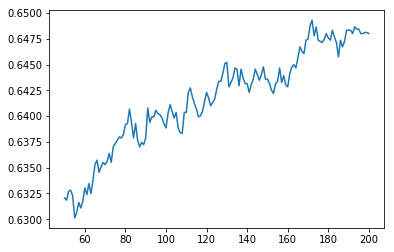

In [10]:
plt.plot(model.num_estimators, model.oob_scores)

In [11]:
forest_scores = zip(model.num_estimators, model.oob_scores)
forest_scores = sorted(forest_scores, key=lambda x: x[1], reverse=True)
forest_scores[0:5]

[(172, 0.64931004743423892),
 (171, 0.64877102199223802),
 (174, 0.64866321690383788),
 (193, 0.64866321690383788),
 (194, 0.6484476067270375)]

In [12]:
model.logistic_coef_[0:20]

[('previous_felony_type_98.0', -0.30707741297403696),
 ('age_fourth_quartile', -0.23510773640271587),
 ('jurisdiction_4.0', -0.23283967877036618),
 ('education_Not ascertained', 0.22902057754890159),
 ('jurisdiction_12.0', -0.20976256497934989),
 ('age_third_quartile', -0.20177494730984893),
 ('drug_treatment_8.0', 0.18776921580647193),
 ('previous_felony_type_8.0', -0.17690702797870855),
 ('sex_Male', 0.15735363990965059),
 ('jurisdiction_7.0', -0.1544319897497583),
 ('jurisdiction_14.0', -0.15421294311480505),
 ('time_employed_>60 percent', -0.15338772073266663),
 ('age_second_quartile', -0.15153905925688305),
 ('prior_felonies_Two or more', 0.14203000263350002),
 ('jurisdiction_19.0', -0.13433112595766572),
 ('jurisdiction_18.0', -0.12324581077471693),
 ('offense_type_Rape (undifferentiated)', -0.12067687588292303),
 ('education_Some high school', 0.12021822214981105),
 ('prior_felonies_Not ascertained', 0.10954407112415161),
 ('jurisdiction_17.0', -0.10878816501889084)]

In [13]:
model.unique_races

['White', 'Black', 'Unknown', 'Asian', 'American Indian', 'Other']

In [14]:
model.score_model()


Logistic Regression
Accuracy:  0.660200452635
Precision:  0.624203821656

Random Forest
Accuracy:  0.651147752991
Precision:  0.612903225806


['665', '659', '420', '1349', '61.3', '23.7', '49.8', '65.1']

In [15]:
model.score_model('Black')

['210', '214', '119', '297', '63.8', '28.6', '50.5', '60.4']

In [16]:
model.score_model('White')

['114', '202', '118', '551', '49.1', '17.6', '63.9', '67.5']

In [17]:
model.score_model('Non-White')

['551', '457', '302', '798', '64.6', '27.5', '45.3', '64.0']